# Plot real data results

In [9]:
#Fixing paths
import sys
sys.path.append('../../FEIT_codes') # Add the parent directory to the path list

#Importing modules
import seaborn as sns
from FEIT_onefile import *
import matplotlib.image as mpimg
import pickle

sns.set()
sns.set_style("ticks")
dpi=200

## Mesh

In [10]:
"Definições Básicas do espaço."
r=14            #Radi
L=16           #Number of Electrodes
per_cober=0.454728409  #Perc. area of elec. on boundary
rotate=pi/2-0.0892857143183109       #Rotation

ele_pos=electrodes_position(L, per_cober, rotate, anticlockwise=False) #Eletrodes position object

N: 681, M: 160, K:1200


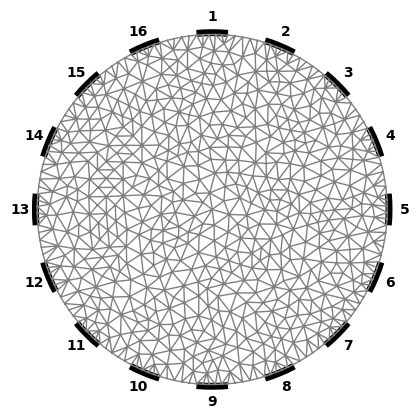

In [11]:
#input
refine_n=15 #Refinement parameter
n_in=6   #Number of vertex on electrodes
n_out=4   #Number of vertex on gaps

mesh=MyMesh(r=r, n=refine_n, n_in=n_in, n_out=n_out, electrodes_obj=ele_pos)
plot_electrodes(mesh, figsize=(5,5), fontsize=10)

#Mesh config
bmesh=BoundaryMesh(mesh, 'exterior', order=True)
print("N: {}, M: {}, K:{}".format(mesh.num_vertices(), bmesh.num_vertices(), mesh.num_cells()))
plt.savefig("figures/real_triang.png", bbox_inches='tight', transparent=True)
plt.show()

### Loading data

In [12]:
expDict={
"NLW_1_2": 'data/datamat_1_2_NLW.data',
"NLW_2_3": 'data/datamat_2_3_NLW.data',
"NLW_4_1":'data/datamat_4_1_NLW.data',
"NTK_1_2": 'data/datamat_1_2_NTK.data',
"NTK_2_3": 'data/datamat_2_3_NTK.data',
"NTK_4_1":'data/datamat_4_1_NTK.data',
}
gamma_all=[]

for name in expDict.keys():
    data = open(expDict[name],'rb')
    mydict = pickle.load(data)
    data.close()
    gamma_all.append(mydict["results"]['gamma_k'][-1])
    
Q_DG=FunctionSpace(mesh,"DG", 0)
for index, gamma_vec in enumerate(gamma_all):
        gamma = Function(Q_DG)
        gamma.vector()[:]=gamma_vec
        gamma_all[index]=gamma
        

In [13]:
target_photos = [
    'target_photos/fantom_1_2.jpg',
    'target_photos/fantom_2_3.jpg',
    'target_photos/fantom_4_1.jpg',
]

### Plot Figure

2.463958352531814
2.8080565526282713
2.657050907634482
3.2637414683292776
4.356691523614149
2.9003753978991784


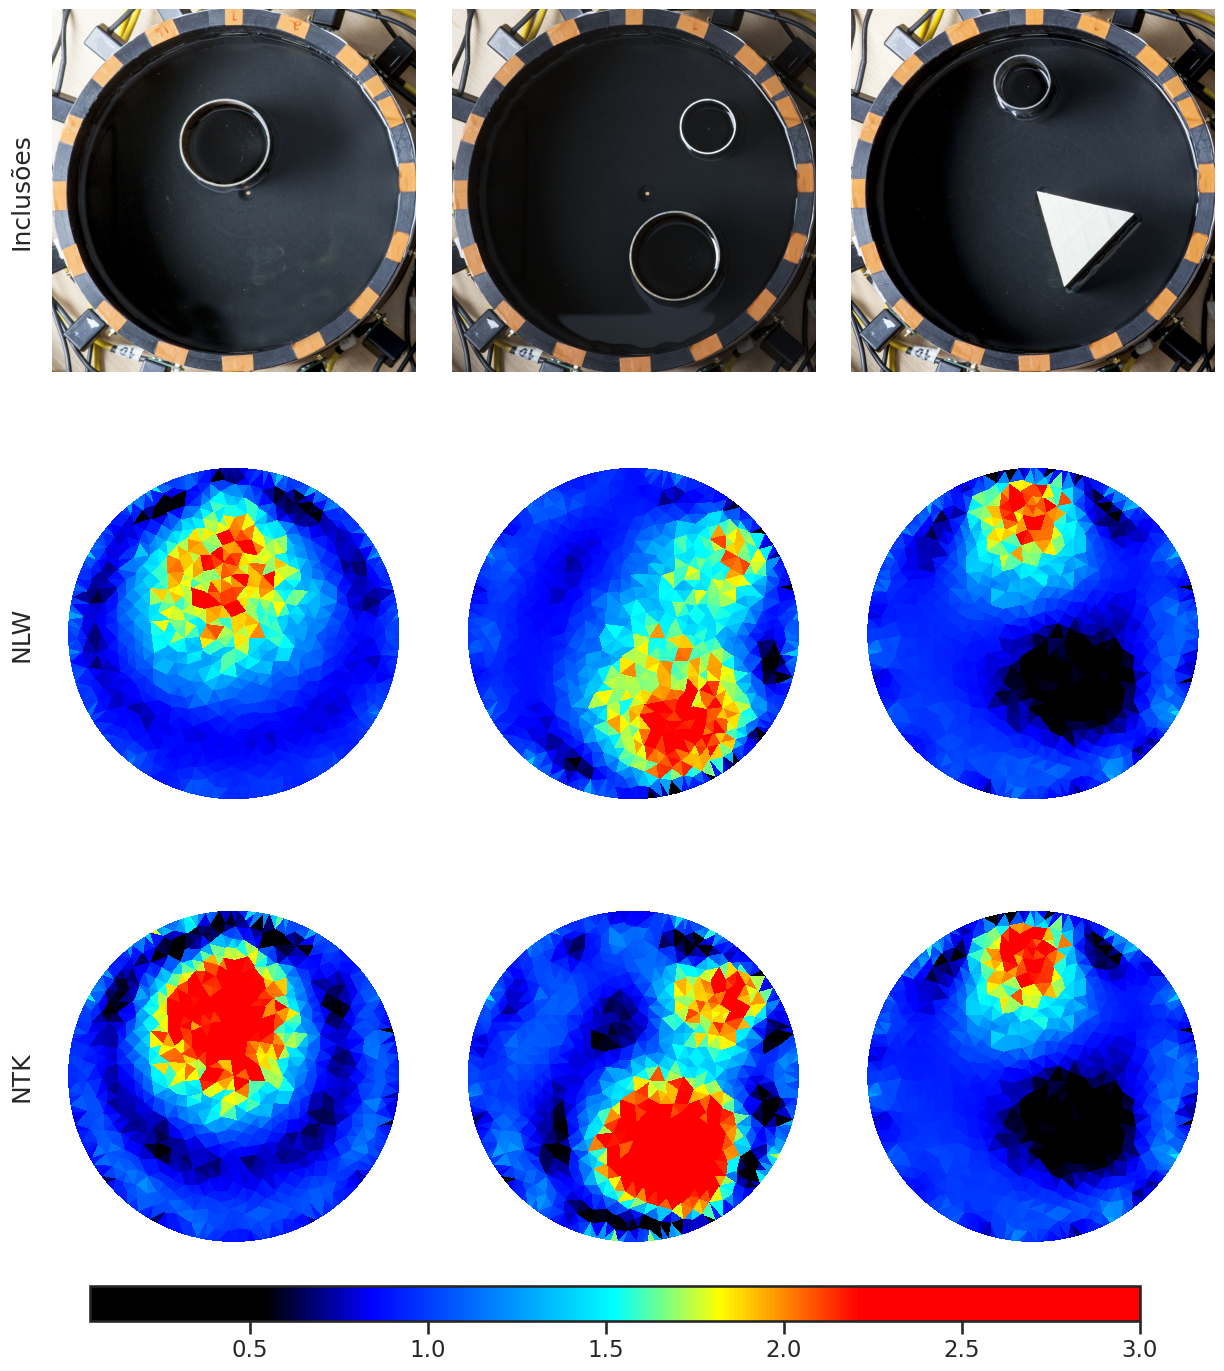

In [18]:
import matplotlib.colors as colors
sns.set_context("talk")
gamma_plot=gamma_all

#cmap='jet'
fig=plt.figure(figsize=(15, 23))
sub_len=3
sub_len2=4


# Set the colorbar with logarithmic scale and centered on 1
cmap = colors.LinearSegmentedColormap.from_list('custom',
                                                    [(0, 'black'),
                                                     (0.5/3, 'black'),
                                                     (0.8/3, 'blue'),
                                                     (1.5/3, 'cyan'),
                                                     (1.8/3, 'yellow'),
                                                     (2.2/3, 'red'),
                                                     (1, 'red')], N=256)
                                                     
len_g=len(gamma_plot)+sub_len
j=0
#newton_error=error
for i in range(1,len_g+1):   
    plt.subplot(sub_len2,sub_len,i+sub_len);
    if i<=sub_len:
        img = mpimg.imread(target_photos[i-1])
        plt.imshow(img)
    else:
        plt.subplot(sub_len2,sub_len,i+sub_len);
        p=plot(gamma_plot[i-1-sub_len]);
        p.set_clim(0.05,3)
        p.set_cmap(cmap)
        print(np.max(gamma_plot[i-1-sub_len].vector()[:]))
    if i==1: plt.ylabel("Inclusões")
    if i==1+sub_len: plt.ylabel("NLW")
    if i==4+sub_len: plt.ylabel("NTK")
    #if i==7+sub_len: plt.ylabel("Method 3")
    #plt.title(legend[i-1])
    
    plt.xticks([])
    plt.yticks([])
    plt.box(False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0., wspace=0.1)

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.15, 0.10, 0.70, 0.015])
fig.colorbar(p, cax=cbar_ax, orientation="horizontal", )
#fig.suptitle('Newton (Landweber)', fontsize=16)

fig.savefig('figures/real_phantom.pdf', bbox_inches='tight', transparent=True, format='pdf')
plt.show()   

In [226]:
0.5/3

0.16666666666666666

In [228]:
1.3/6*3

0.65

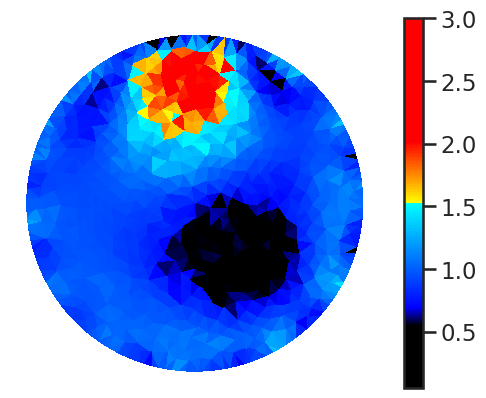

In [204]:
#import matplotlib as mpl
p=plot(gamma_plot[2]);
p.set_clim(0.05,3)
plt.xticks([])
plt.yticks([])
plt.box(False)
#plt.colorbar(p)


p.set_cmap(cmap)
#normi = mpl.colors.TwoSlopeNorm(vmin=0.5, vcenter=1, vmax=2.0)
#p.set_norm(normi)

cbar = plt.colorbar(p, cmap="jet")
cbar.vmin=0.5
cbar.vmax=3
plt.show()
#cbar.set_ticks([-500, 0, 1000, 2000, 3000, 4000])

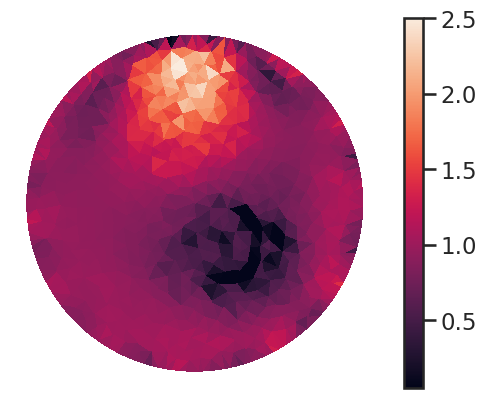

In [132]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

p = plot(gamma_plot[2])
p.set_clim(0.05, 2.5)
plt.xticks([])
plt.yticks([])
plt.box(False)

# Create a custom color map with the same color for 2 to 3
cmap_colors = ['blue', 'green', 'yellow']  # Adjust the colors as desired
cmap = ListedColormap(cmap_colors)

# Set the colorbar with the custom colormap
cbar = plt.colorbar(p, cmap=cmap)

# Set the colorbar limits to go from 2 to 3

plt.show()

In [17]:
dataDict = {}

for name in expDict.keys():
    data = open(expDict[name],'rb')
    mydict = pickle.load(data)
    data.close()
    dataDict[name] = {}
    dataDict[name]['res_vec'] = mydict["results"]["res_vec"]
    dataDict[name]['delta'] = mydict["results"]["delta"]
    dataDict[name]['data0_vec'] = mydict["results"]["data0_vec"]
    dataDict[name]['lastU0_vec'] = mydict["results"]["lastU0_vec"]
    dataDict[name]['tau'] = mydict["config"]["tau"]
    dataDict[name]['tau'] = mydict["config"]["tau"]



0
1
2


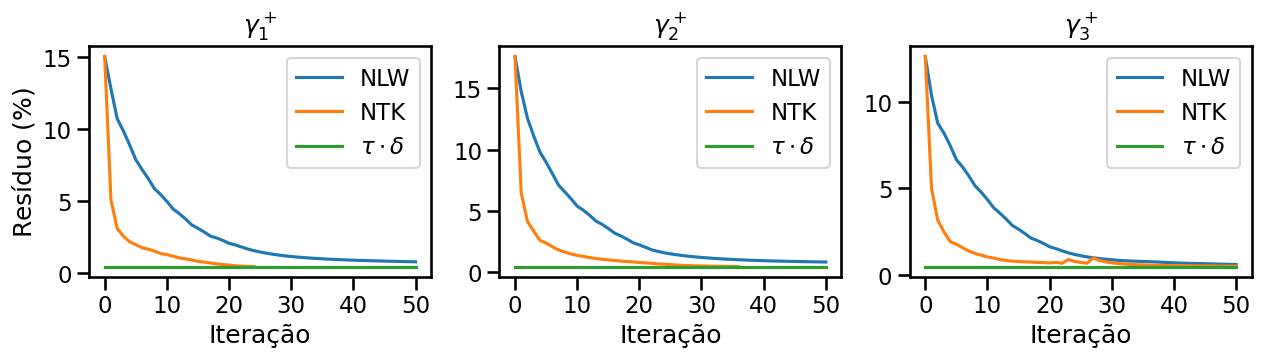

In [19]:
sns.reset_orig()
sns.set_context("talk")

exp_view1 = [ "NLW_1_2",  "NTK_1_2"]
exp_view2 = [ "NLW_2_3",  "NTK_2_3"]
exp_view3 = [ "NLW_4_1",  "NTK_4_1"]
exp_views = [exp_view1, exp_view2, exp_view3]
exps_names=["NLW", "NTK"]
data_view = ['res_vec']
n,m = len(exp_view1), len(data_view)


fig, ax = plt.subplots(1,3, figsize=(15,3))
for j, exp_view in enumerate(exp_views):
    #fig, ax = plt.subplots(figsize=(7, 5))
    #colors = iter([plt.cm.Set1(i) for i in range(4)])
    #colors = iter(pl.cm.brg(np.linspace(0,1,3)))

    len_max = 0
    for i, exp in enumerate(exp_view) :   
        res_vec = dataDict[exp][data_view[0]]
        ax[j].plot(res_vec, label=exps_names[i])
        len_max = max(len_max, len(res_vec))
        ax[j].set_title("$\gamma^+_{}$".format(j+1), pad=10)
    
    delta, tau = dataDict[exp]["delta"], dataDict[exp]["tau"]
    ax[j].plot(np.ones(len_max)*delta*tau*100, label=r"$\tau \cdot \delta$")
    if j==0:      
        ax[j].set_ylabel(r"Resíduo $(\%)$")
    #plt.xlim(0,13)
    ax[j].set_xticks(np.arange(0,51,10))
    #plt.yticks(np.arange(0,20,4))
    ax[j].set_xlabel("Iteração")
    ax[j].legend()
    print(j)
figname="figures/resnonlin.pdf".format(name)
fig.savefig(figname, bbox_inches='tight', transparent=True, format='pdf')
#figname="figures/resnonlin.eps".format(name)
plt.show()   
